## Project Stage - III (Distributions and Hypothesis Testing)

## Goals

The goal of Stage III is to develop advanced data for modeling for comparative analysis and hypothesis testing. 


### Tasks:

#### Task 1: Distribution Analysis (50 pts)     
- Member: (50 pts)
    - **M1.1** Compare NC and KY on Opioid Mortality - 2019 Data (20 pts)
         - Create histograms for NC and KY for Opioid Mortality (Normalized Mortality Rate)
         - Merge them into a single graph
         - Plot mean lines for both the histograms

#### For this task:
- I'll first load the merged data frame created in previous stage and then select NC and KY data
- Then, I use State Abbreviation as color (similar to hue argument in seaborn) to display histogram of both states on the same plot
- Finally, I use add_vline method to add mean normalized death for each state to the current histogram

In [1]:
# load merged data frame and filter it for KY and NC
import pandas as pd
super_df = pd.read_csv('Merged_DataFrame.csv')
super_df_NC_KY = super_df[super_df['State Abbreviation'].isin(['NC','KY'])]

In [2]:
import plotly.express as px
# Create a histogram of Normalized Deaths variable for NC and KY as a distribution. 
fig = px.histogram(super_df_NC_KY, x="Norm_Deaths", opacity = 0.85, color = 'State Abbreviation', title = "NC and KY Opioid Related Normalized Death Per 100,000 Population")

# Add a vertical line to the histogram representing the ***mean*** Normalized Opioid Death for NC. 
fig.add_vline(x=super_df[super_df['State Abbreviation'] =='NC']['Norm_Deaths'].mean(),line_dash="dash",annotation_text="NC Mean", annotation_position="top left")

# Add a vertical line to the histogram representing the ***mean*** Normalized Opioid Death for KY. 
fig.add_vline(x=super_df[super_df['State Abbreviation'] =='KY']['Norm_Deaths'].mean(),line_dash="dot",annotation_text="KY Mean", annotation_position="top right")


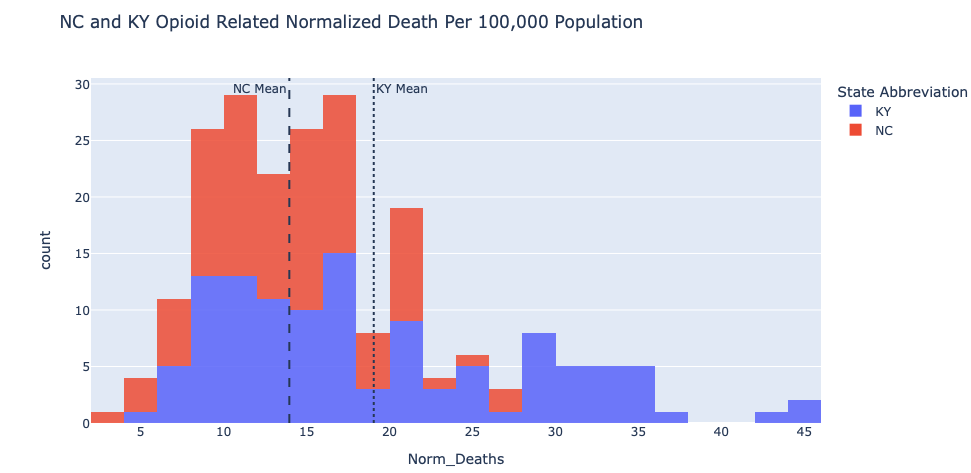

In [6]:
from IPython.display import Image
Image("screenshots/1.png")

#### Task 1: Distribution Analysis (50 pts) 
- Member: (50 pts)    
    - **M1.2** Evaluate a distribution for the Normalized Mortality Rate (20 pts)
        - Choose a distribution for Normalized Mortality Rate
            - Provide explanation of your choice
        - Develop distribution estimator with - Method of Moments (MoM), Maximum Likelihood (MLE), and Kernel Density Estimation (KDE)
        - Plot the distribution estimations over the histograms
            - Each should be color coded on the graph and described for their parameters
            - Discuss which estimator works the best and why

#### For this task:
-  I'll first visuallize the normalized death and select a proper distribution
-  Then, for selected distribution, I plot the distribution estimator for three methods in line with the original distribution
-  Finally, I provide my exlpaination for selecting the best of three methods

In [3]:
# visuallizing the normalized death data
px.histogram(super_df, x="Norm_Deaths", opacity = 0.85,  title = "US Opioid Related Normalized Death Per 100,000 Population")

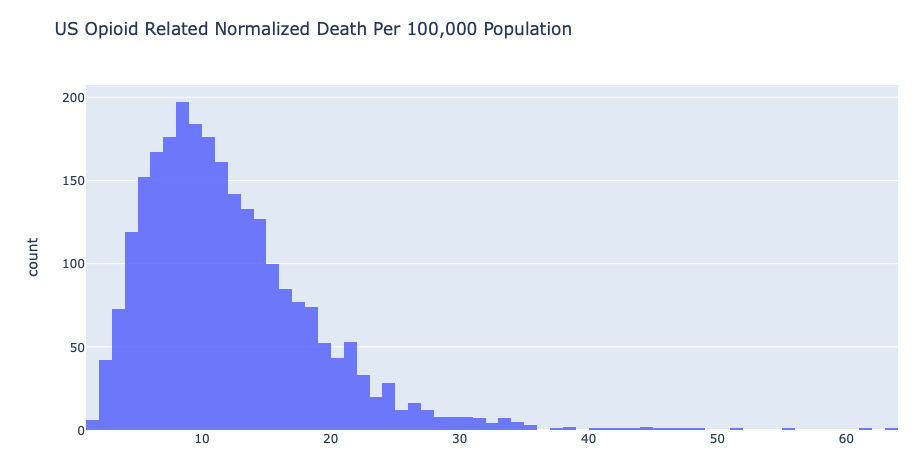

In [8]:
from IPython.display import Image
Image("screenshots/2.png")

##### Some notes on selecting proper distribution
- The distribution is either similar to gamma or normal distribution. I read an article on medium (https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9) that provides a guidline on selecting suitable theorotical distribution for the available data. 
- Gamma, Exponential, Uniform, and Normal distribtions are some common distributions that can be tested by Fitter function introduced in above article
 - According to this and based on sumsquare_error values, Gamma is the best distribution among those that I have tested.
- The list of distribution I tested is mainly based on the distributions covered in class. There might be a better distribution that slightly outperform Gamma. 

In [5]:
#pip install fitter

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 18.4 MB/s eta 0:00:0000:01
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=51411d4c75a67d6b074d927ead23431d8ed6e8a4f75ffc2858c4b8e28e92ce50
  Stored in directory: /Users/parisafarahani/Library/Caches/pip/wheels/e2/61/91/27138abaab263acc3874ef03fe29140fb0d42d5cb1406ef635
Successfully built fitter
Note: you may need to restart the kernel to use updated packages.


Fitting 4 distributions: 100%|████████████████████| 4/4 [00:00<00:00, 76.88it/s]

{'gamma': {'a': 2.9061086491605264, 'loc': 1.021490483700656, 'scale': 3.828966301269168}}


sumsquare_error          aic           bic  kl_div  ks_statistic  \
gamma           0.000779  1332.689989 -37861.313867     inf      0.011361   
norm            0.007670  2148.998957 -32090.378404     inf      0.088590   
expon           0.030673  1048.966330 -28587.844949     inf      0.199862   
uniform         0.057077   828.602613 -27018.529072     inf      0.590991   

            ks_pvalue  
gamma    8.962659e-01  
norm     1.048767e-17  
expon    6.018522e-89  
uniform  0.000000e+00

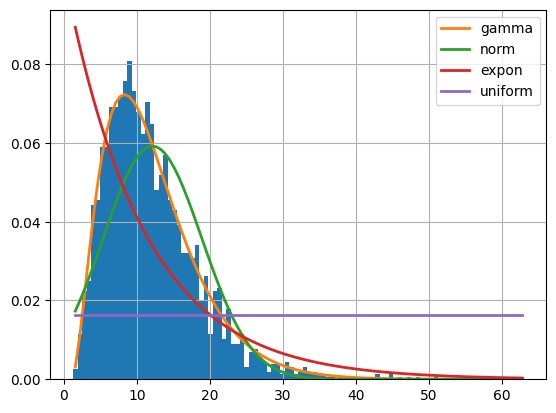

In [4]:
import fitter
from fitter import Fitter
f = Fitter(super_df['Norm_Deaths'].values,
distributions=['gamma','expon',"norm","uniform"])
f.fit()
print(f.get_best(method = 'sumsquare_error'))
f.summary()

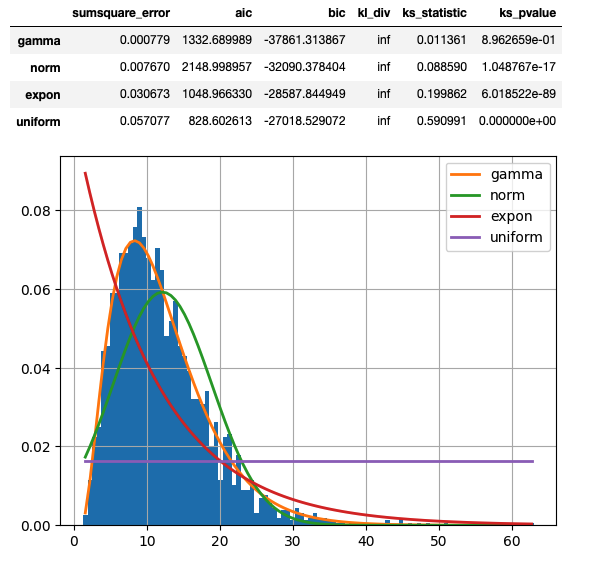

In [10]:
from IPython.display import Image
Image("screenshots/3.png")

In [5]:
# Develop distribution estimator with - Method of Moments (MoM)
from scipy.stats.distributions import gamma
import numpy as np
import matplotlib.pyplot as plt

mean = super_df['Norm_Deaths'].mean()
var = super_df['Norm_Deaths'].var()
alpha_mom = mean ** 2 / var
beta_mom = var / mean
gamma_dist_MoM =  gamma.pdf(np.linspace(0, 70,1000), alpha_mom, loc=0, scale = beta_mom)

In [6]:
# Develop distribution estimator with -  Maximum Likelihood (MLE)
from scipy.special import psi, polygamma
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)
from scipy.optimize import newton
# Calculate statistics
log_mean = np.log(super_df['Norm_Deaths'].mean())
mean_log = np.log(super_df['Norm_Deaths']).mean()
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
beta_mle = alpha_mle/super_df['Norm_Deaths'].mean()
#
gamma_dist_MLM = gamma.pdf(np.linspace(0, 70,1000), alpha_mle,  loc = 0, scale = 1/beta_mle)


In [7]:
# Develop distribution estimator with - Kernel Density Estimation (KDE)
from scipy.stats import kde
KDE_density = kde.gaussian_kde(super_df['Norm_Deaths'], bw_method=None)
gamma_dist_KDE = KDE_density(np.linspace(0, 70,1000))

/var/folders/68/l23cjsw133d5gkhpn60nw9640000gn/T/ipykernel_3832/3832434214.py:3: DeprecationWarning:

Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.



In [8]:
# get bins and counts for each bin when ploting Norm_Deaths histogram. This will later be used to plot the distribtion of data in line with the distribution estimator
counts, bin_edges = np.histogram(super_df['Norm_Deaths'], density = True, bins = 70)

In [9]:
import plotly.graph_objects as go
x = np.linspace(0, 70,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=gamma_dist_MoM,mode='lines',name='Method of Moments'))
fig.add_trace(go.Scatter(x=x, y=gamma_dist_MLM,mode='lines',name='Maximum Likelihood Method'))
fig.add_trace(go.Scatter(x=x, y=gamma_dist_KDE,mode='lines', name='Kernel Density Estimation'))
fig.add_trace(go.Bar(x=bin_edges, y = counts,name = 'Normaliezed Deaths Distribution'))
fig.show()

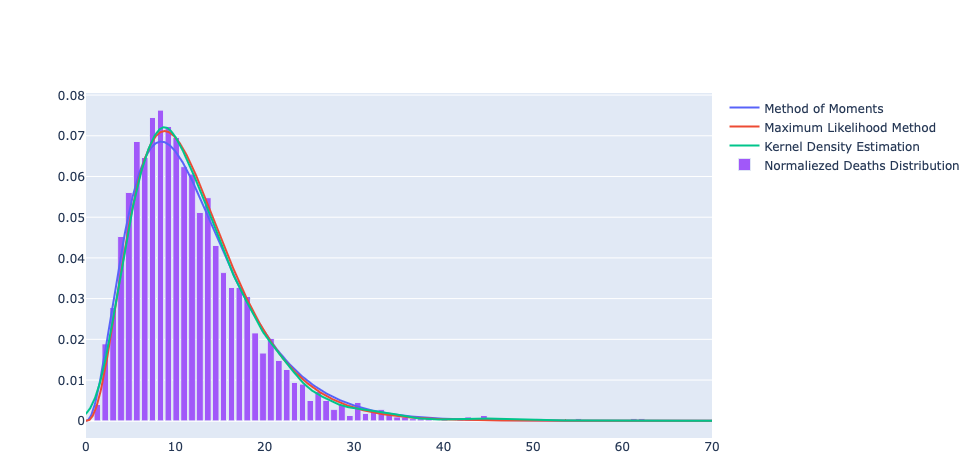

In [16]:
from IPython.display import Image
Image("screenshots/4.png")

##### 
- Below I calculated mean squared error for real distribution as well as distribution estimators. KDE turns out to slightly outperforms other methods because it has lowest mse.

In [10]:

OBS, bins = np.histogram(super_df['Norm_Deaths'], density = True, bins = np.linspace(0, 70,1001))
mse = np.mean((OBS - gamma_dist_KDE)**2)
print('mse for KDE is: ' + str(mse))
mse = np.mean((OBS - gamma_dist_MoM)**2)
print('mse for MOM is: ' + str(mse))
mse = np.mean((OBS - gamma_dist_MLM)**2)
print('mse for MLM is: ' + str(mse))

mse for KDE is: 7.703600732145187e-05
mse for MOM is: 7.935161626223034e-05
mse for MLM is: 7.707464251209312e-05


#### Task 1: Distribution Analysis (50 pts) 
- Member: (50 pts)    
    - **M1.3** Select the top two states identified in Stage I and recreate the M1.2 task (10 pts)
         - Discuss the results

In [11]:
# For KY
# Develop distribution estimator with - Method of Moments (MoM)
from scipy.stats.distributions import gamma
import numpy as np
import matplotlib.pyplot as plt
mean = super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths'].mean()
var = super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths'].var()
alpha_mom = mean ** 2 / var
beta_mom = var / mean
gamma_dist_MoM =  gamma.pdf(np.linspace(0, 70,1000), alpha_mom, loc=0, scale = beta_mom)

# Develop distribution estimator with -  Maximum Likelihood (MLE)
from scipy.special import psi, polygamma
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)
from scipy.optimize import newton
# Calculate statistics
log_mean = np.log(super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths'].mean())
mean_log = np.log(super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths']).mean()
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
beta_mle = alpha_mle/super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths'].mean()
#
gamma_dist_MLM = gamma.pdf(np.linspace(0, 70,1000), alpha_mle,  loc = 0, scale = 1/beta_mle)


# Develop distribution estimator with - Kernel Density Estimation (KDE)
from scipy.stats import kde
KDE_density = kde.gaussian_kde(super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths'], bw_method=None)
gamma_dist_KDE = KDE_density(np.linspace(0, 70,1000))

# get bins and counts for each bin when ploting Norm_Deaths histogram. This will later be used to plot the distribtion of data in line with the distribution estimator
counts, bin_edges = np.histogram(super_df[super_df['State Abbreviation'] == 'KY' ]['Norm_Deaths'], density = True, bins = 70)

import plotly.graph_objects as go
x = np.linspace(0, 70,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=gamma_dist_MoM,mode='lines',name='Method of Moments'))
fig.add_trace(go.Scatter(x=x, y=gamma_dist_MLM,mode='lines',name='Maximum Likelihood Method'))
fig.add_trace(go.Scatter(x=x, y=gamma_dist_KDE,mode='lines', name='Kernel Density Estimation'))
fig.add_trace(go.Bar(x=bin_edges, y = counts,name = 'Normaliezed Deaths Distribution for KY'))
fig.show()

/var/folders/68/l23cjsw133d5gkhpn60nw9640000gn/T/ipykernel_3832/77637060.py:29: DeprecationWarning:

Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.



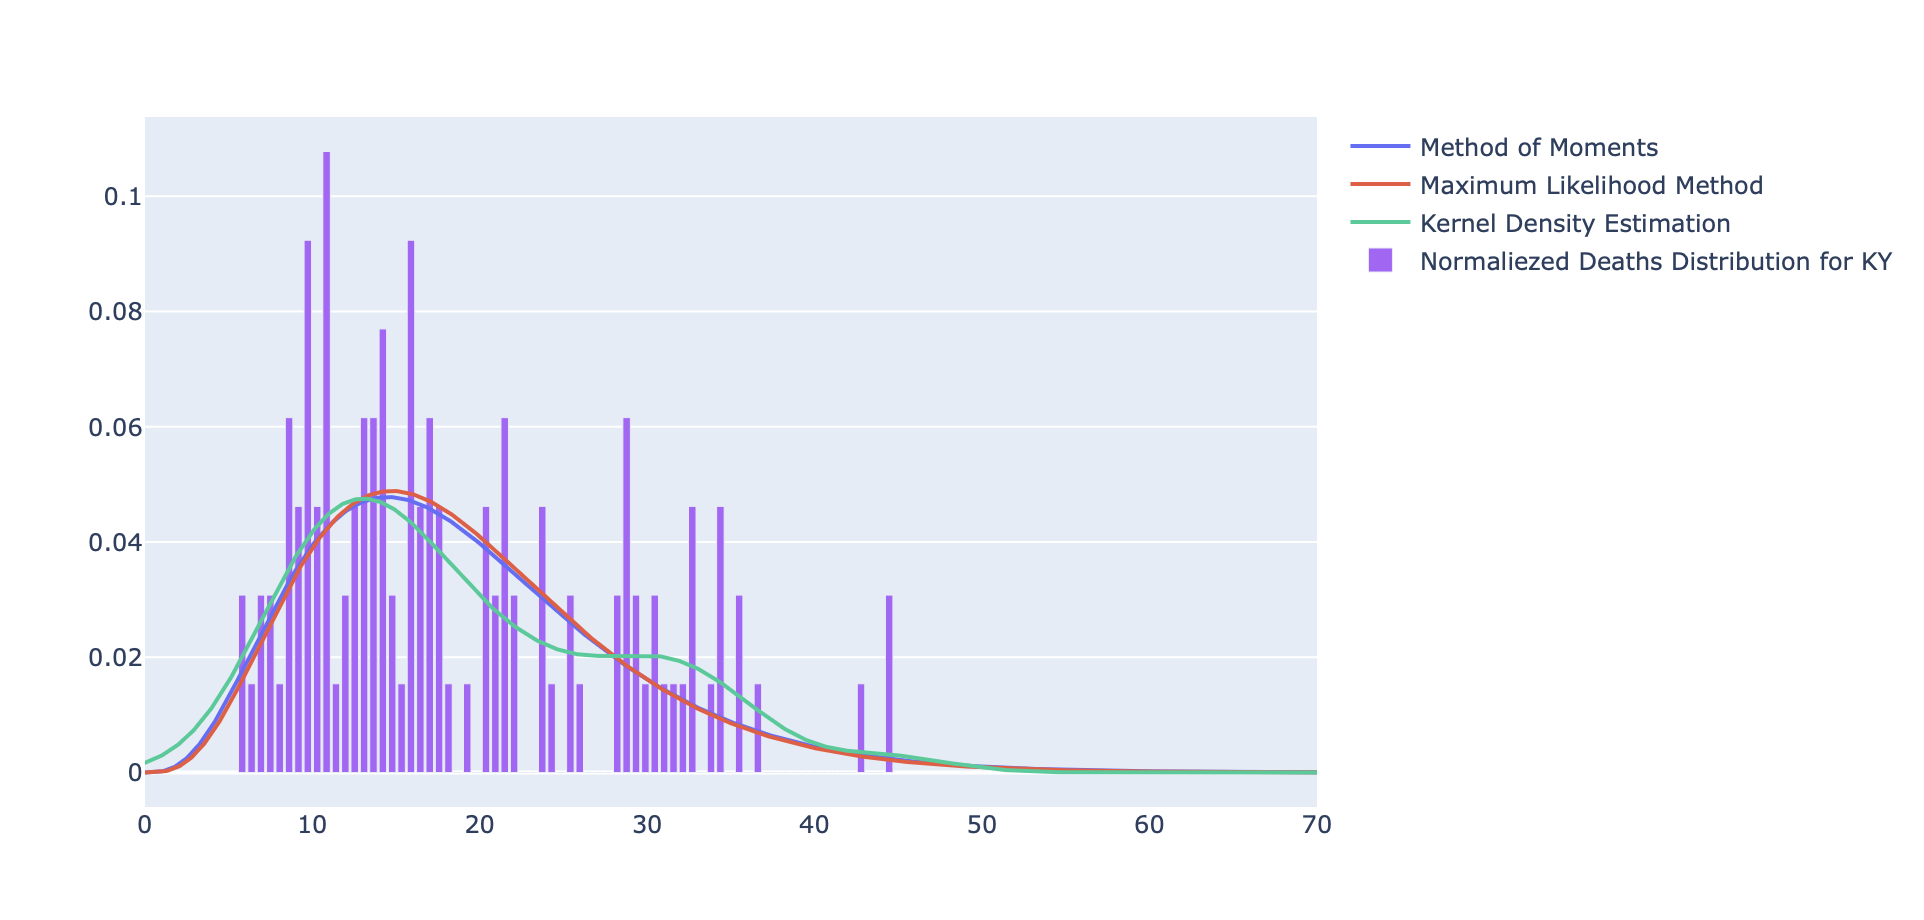

In [19]:
from IPython.display import Image
Image("screenshots/5.png")

In [12]:
# For TN
# Develop distribution estimator with - Method of Moments (MoM)
from scipy.stats.distributions import gamma
import numpy as np
import matplotlib.pyplot as plt
mean = super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths'].mean()
var = super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths'].var()
alpha_mom = mean ** 2 / var
beta_mom = var / mean
gamma_dist_MoM =  gamma.pdf(np.linspace(0, 70,1000), alpha_mom, loc=0, scale = beta_mom)

# Develop distribution estimator with -  Maximum Likelihood (MLE)
from scipy.special import psi, polygamma
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)
from scipy.optimize import newton
# Calculate statistics
log_mean = np.log(super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths'].mean())
mean_log = np.log(super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths']).mean()
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
beta_mle = alpha_mle/super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths'].mean()
#
gamma_dist_MLM = gamma.pdf(np.linspace(0, 70,1000), alpha_mle,  loc = 0, scale = 1/beta_mle)


# Develop distribution estimator with - Kernel Density Estimation (KDE)
from scipy.stats import kde
KDE_density = kde.gaussian_kde(super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths'], bw_method=None)
gamma_dist_KDE = KDE_density(np.linspace(0, 70,1000))

# get bins and counts for each bin when ploting Norm_Deaths histogram. This will later be used to plot the distribtion of data in line with the distribution estimator
counts, bin_edges = np.histogram(super_df[super_df['State Abbreviation'] == 'TN' ]['Norm_Deaths'], density = True, bins = 70)

import plotly.graph_objects as go
x = np.linspace(0, 70,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=gamma_dist_MoM,mode='lines',name='Method of Moments'))
fig.add_trace(go.Scatter(x=x, y=gamma_dist_MLM,mode='lines',name='Maximum Likelihood Method'))
fig.add_trace(go.Scatter(x=x, y=gamma_dist_KDE,mode='lines', name='Kernel Density Estimation'))
fig.add_trace(go.Bar(x=bin_edges, y = counts,name = 'Normaliezed Deaths Distribution for TN'))
fig.show()

/var/folders/68/l23cjsw133d5gkhpn60nw9640000gn/T/ipykernel_3832/1386952481.py:29: DeprecationWarning:

Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.



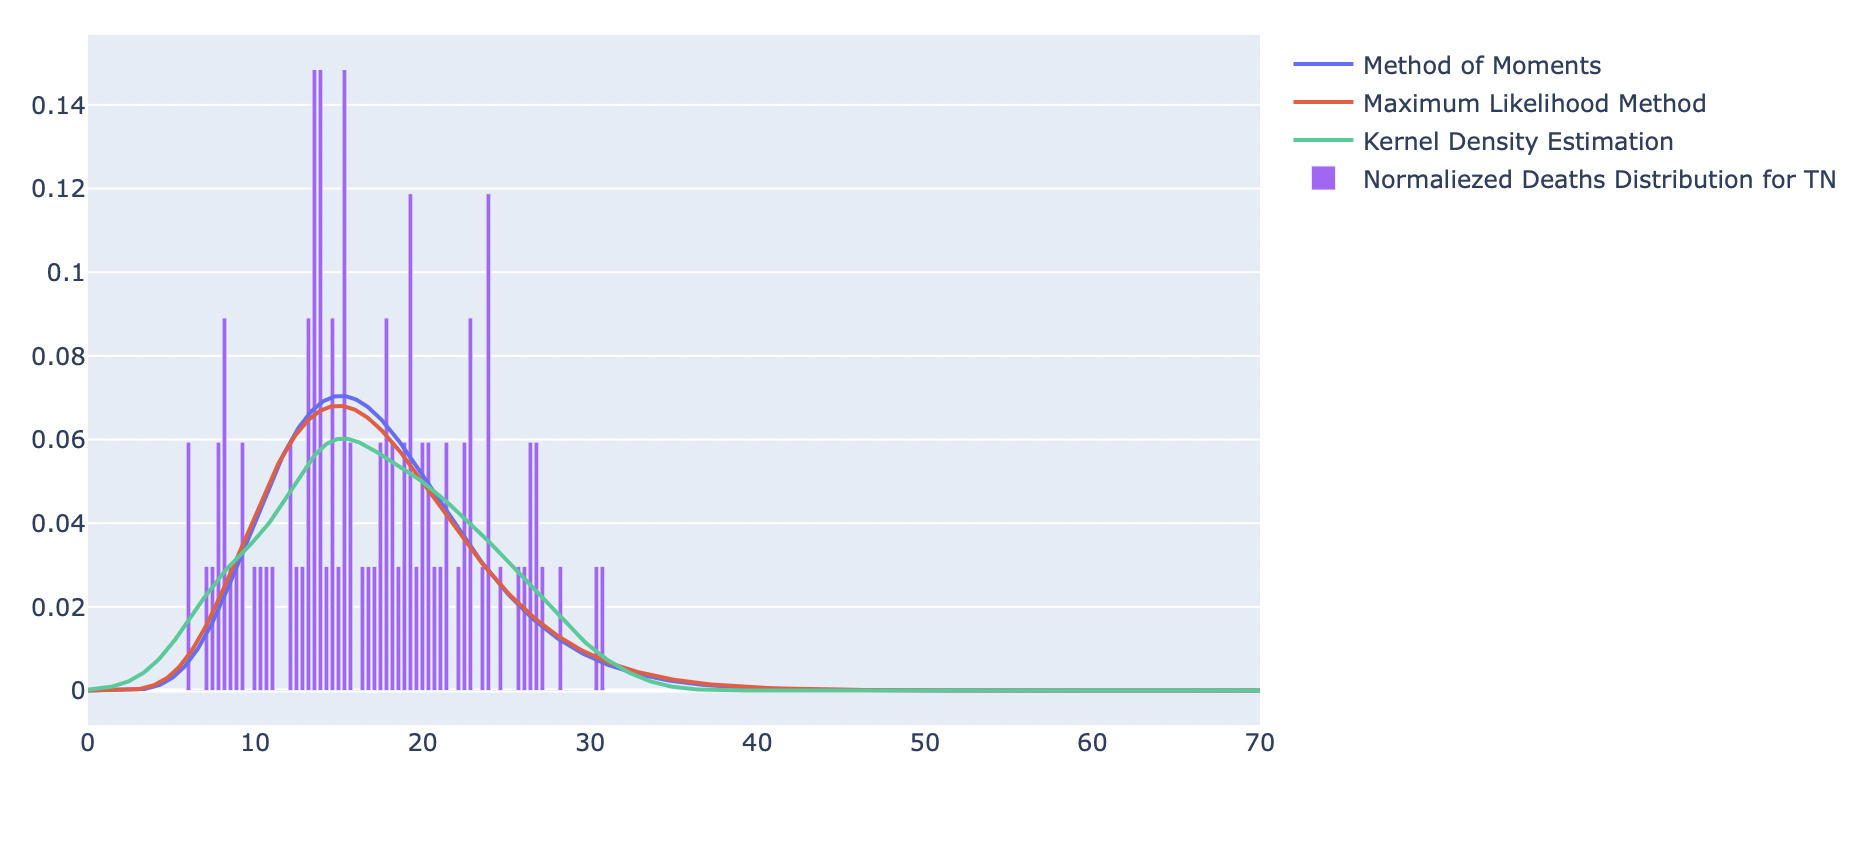

In [20]:
from IPython.display import Image
Image("screenshots/6.png")

- These two states have the higher average value and smaller range compare to the US.


#### Task 2: Hypothesis Testing and Regression (50 pts)     
- Member: (50 pts)
    - **M2.1** Formulate Hypothesis for 5 identified variables in Stage 1 and test the hypothesis (25 pts)
        - For example, if your variable was `Premature death raw value`, divide the observations into two categories, high and low
            - Compare the distributions for a hypothesis test.
        - Formally state the Null and Alternative Hypothesis
        - Define the type of hypothesis and the thresholds
        - Conduct the test and discuss the results for all 5 variables

- 'Primary care physicians raw value','Life expectancy raw value','Premature death raw value'
,'Unemployment raw value','Some college raw value' are the five parameters considered here
- I separated data into two groups based on median Norm_Deaths. Those with values higher than median are in high category.
- I'll use two tailed t-test and at 5% signifcant level (95% cofidence interval) for testing
- Null and Alternative Hypothesis can be expressed as follows:
- **H0** - There is no difference between the "life expectancy raw value" in counties with above and below average "Norm_Deaths"
- **H1** - There is a significant difference between the "life expectancy raw value" in counties with above and below average "Norm_Deaths"


In [13]:
import scipy.stats as stats
# create high and low data frame
selected_df_high = super_df[super_df['Norm_Deaths']>super_df['Norm_Deaths'].median()]
selected_df_low = super_df[super_df['Norm_Deaths']<=super_df['Norm_Deaths'].median()]
# filter thosed data frame for five selected variables
selected_df_low = selected_df_low [['Primary care physicians raw value','Life expectancy raw value','Premature death raw value'
,'Unemployment raw value','Some college raw value']]
selected_df_high = selected_df_high [['Primary care physicians raw value','Life expectancy raw value','Premature death raw value'
,'Unemployment raw value','Some college raw value']]

In [14]:
# perform t-test
import scipy.stats as stats
p_value = []
variable = []
for column in selected_df_high.columns:
    a = selected_df_high[column].dropna()
    b = selected_df_low[column].dropna()
    p_value.append(stats.ttest_ind(a,
                b)[1])
    variable.append(column)


tmp_df = pd.DataFrame()
tmp_df['variable'] = variable
tmp_df['p_value'] = p_value
tmp_df['outcome'] = ['Reject the null hypothesis' if item<0.05 else 'Fail to Reject the null hypothesis' for item in tmp_df.p_value]
tmp_df

variable       p_value  \
0  Primary care physicians raw value  1.346543e-05   
1          Life expectancy raw value  4.559017e-23   
2          Premature death raw value  1.617207e-24   
3             Unemployment raw value  9.408775e-08   
4             Some college raw value  8.262440e-01   

                              outcome  
0          Reject the null hypothesis  
1          Reject the null hypothesis  
2          Reject the null hypothesis  
3          Reject the null hypothesis  
4  Fail to Reject the null hypothesis

##### Conclusion
- There is some difference that exists in the top four variables listed in above table for high and low normalized death values!
- I should replace the last variable by a new varibale as it does not differ for two groups with low and high normalized deaths.

#### Task 2: Hypothesis Testing and Regression (50 pts)     
- Member: (50 pts)
    - **M2.2** Perform linear regression to discover patterns (25 pts)
         - Perform a linear regression between Normalized Mortality and `Opiod_Dispensing_Rate`
             - Normalize the `Opiod_Dispensing_Rate` to the population
         - Perform multiple linear regression model with your 5 variables and `Opiod_Dispensing_Rate`
             - Evaluate the results and describe them.
         - Test non-linear model with the 5 + 1 variables (n=2,3,4)
             - Evaluate the results and describe them.

#### For this task
- I first normalized dispensing rate. Opiod_Dispensing_Rate is expressed per 100 person, so we need to multiply by 1,000 to be expressed per 100,000 population
- Second, based on t-test and considering this new normalized variable, I replaced "Some college raw value" by "Norm_Opiod_Dispensing_Rate" due to two reasons:
- 1) the new variable should be considered because it expresses opioid related drug consumption
- 2) It does not differ for two groups with low and high normalized deaths.
- Finally, I expressed the results for linear and non-linear regressions.

In [15]:
# Opiod_Dispensing_Rate is expressed per 100 person, so we need to multiply it by 1,000 to be expressed per 100,000 population
# Opiod_Dispensing_Rate per 100 = ((Opiod_Dispensing_Rate raw)/Population)*100
# Opiod_Dispensing_Rate per 100,000 = ((Opiod_Dispensing_Rate raw)/Population)*100,000
# Opiod_Dispensing_Rate per 100,000 = Opiod_Dispensing_Rate per 100 * 1,000
super_df['Norm_Opiod_Dispensing_Rate'] = (super_df['Opiod_Dispensing_Rate'])*1000

In [18]:
#pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
# I replace "Some college raw value" by "Norm_Opiod_Dispensing_Rate" due to two reasons:
# 1) the new variable should be considered because it expresses opioid related drug consumption
# 2) It does not differ for two groups with low and high normalized deaths.

import statsmodels.formula.api as smf
# create a fitted model in one line
lm = smf.ols(formula='Norm_Deaths ~ Q("Norm_Opiod_Dispensing_Rate") + Q("Primary care physicians raw value") + Q("Life expectancy raw value") + Q("Premature death raw value") + Q("Unemployment raw value")', data= super_df).fit()

# print the coefficients
lm.params

Intercept                                   -4.050354
Q("Norm_Opiod_Dispensing_Rate")             -4.395861
Q("Primary care physicians raw value")    3961.287115
Q("Life expectancy raw value")               0.043944
Q("Premature death raw value")               0.001133
Q("Unemployment raw value")                 25.986149
dtype: float64

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Norm_Deaths   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     92.84
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           8.59e-90
Time:                        17:58:39   Log-Likelihood:                -8043.3
No. Observations:                2479   AIC:                         1.610e+04
Df Residuals:                    2473   BIC:                         1.613e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.0504     10.921     -0.371      0.711     -25.465      17.364
Q("Norm_Opiod_Dispensing_Rate")           -4.3959      0.776     -5.668      0.000      -5.917      -2.875
Q("Primary care physicians raw value")  3961.2871    401.393      9.869      0.000    3174.186    4748.388
Q("Life expectancy raw value")             0.0439      0.127      0.346      0.730      -0.205       0.293
Q("Premature death raw value")             0.0011      0.000      7.615      0.000       0.001       0.001
Q("Unemployment raw value")               25.9861      9.168      2.834      0.005       8.008      43.964
==============================================================================
Omnibus:                      504.817   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1661.591
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       6.467   Cond. No.                     2.84e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

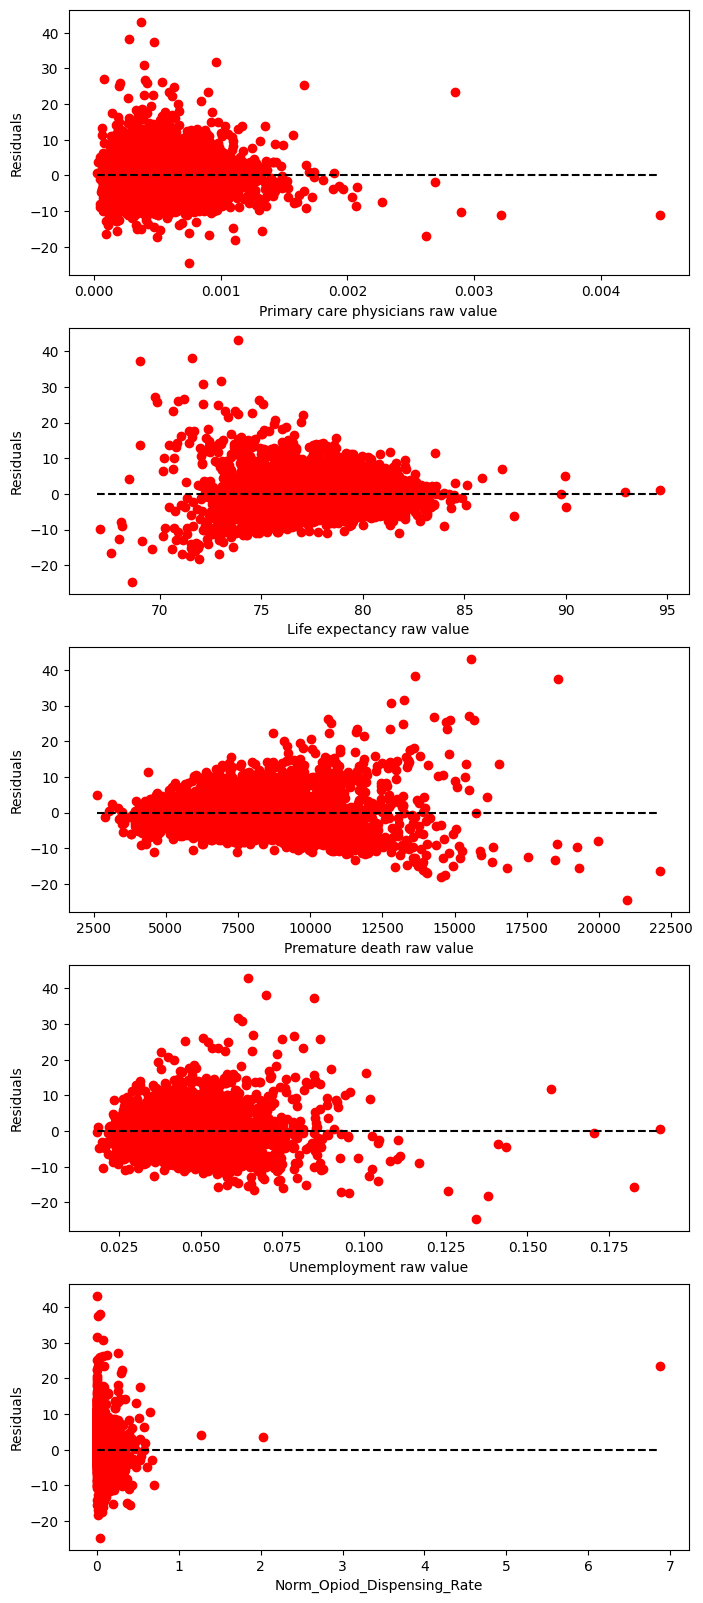

In [26]:
super_df['pred'] =  lm.params[0] + lm.params[1]*super_df['Norm_Opiod_Dispensing_Rate'] + lm.params[2]*super_df['Primary care physicians raw value']  + lm.params[3]*super_df['Life expectancy raw value'] + lm.params[4]*super_df['Premature death raw value']  + lm.params[5]*super_df['Unemployment raw value'] 
super_df['residuals'] = super_df.Norm_Deaths - super_df['pred'] 
plt.figure(figsize= (8,20))
variables_ = ['Primary care physicians raw value','Life expectancy raw value','Premature death raw value','Unemployment raw value','Norm_Opiod_Dispensing_Rate']
for i in range(0,5):
    plt.subplot(5,1,i+1)
    plt.plot(super_df[variables_[i]],super_df.residuals,'ro')
    plt.plot((super_df[variables_[i]].min(),super_df[variables_[i]].max()),[0,0],'k--')
    plt.xlabel(variables_[i])
    plt.ylabel('Residuals')

##### Conclusion For linear model:
- p-values for two coefficients including the "Intercept" and "Life expectancy raw value" is not significant. These two variables may be replaced by a new variable or eliminated from current model to improve its accuracy.
- "Intercept" for instance, changes its signe at lower and upper bands that shows low confidence in the intercept. 
- R-squared is low and model does not perform really well
- However, I cannot say that there is a trend in reisiduals for variables consdiered here.

In [27]:
#omitting the intercept
nlm = smf.ols(formula='Norm_Deaths ~ 0 + Q("Norm_Opiod_Dispensing_Rate")**2 + Q("Primary care physicians raw value") + Q("Life expectancy raw value") + Q("Premature death raw value") + Q("Unemployment raw value") + Q("Some college raw value")', data= super_df).fit()

# print the coefficients
nlm.params

Q("Norm_Opiod_Dispensing_Rate")             -4.087989
Q("Primary care physicians raw value")    2915.435745
Q("Life expectancy raw value")              -0.074986
Q("Premature death raw value")               0.001166
Q("Unemployment raw value")                 35.265332
Q("Some college raw value")                  8.705625
dtype: float64

In [28]:
nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Norm_Deaths   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              1691.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:58:50   Log-Likelihood:                         -8027.7
No. Observations:                2479   AIC:                                  1.607e+04
Df Residuals:                    2473   BIC:                                  1.610e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Q("Norm_Opiod_Dispensing_Rate")           -4.0880      0.772     -5.292      0.000      -5.603      -2.573
Q("Primary care physicians raw value")  2915.4357    439.280      6.637      0.000    2054.040    3776.831
Q("Life expectancy raw value")            -0.0750      0.015     -5.092      0.000      -0.104      -0.046
Q("Premature death raw value")             0.0012   5.77e-05     20.211      0.000       0.001       0.001
Q("Unemployment raw value")               35.2653      9.230      3.821      0.000      17.165      53.365
Q("Some college raw value")                8.7056      1.551      5.612      0.000       5.663      11.748
==============================================================================
Omnibus:                      496.287   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1705.631
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       6.562   Cond. No.                     3.13e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

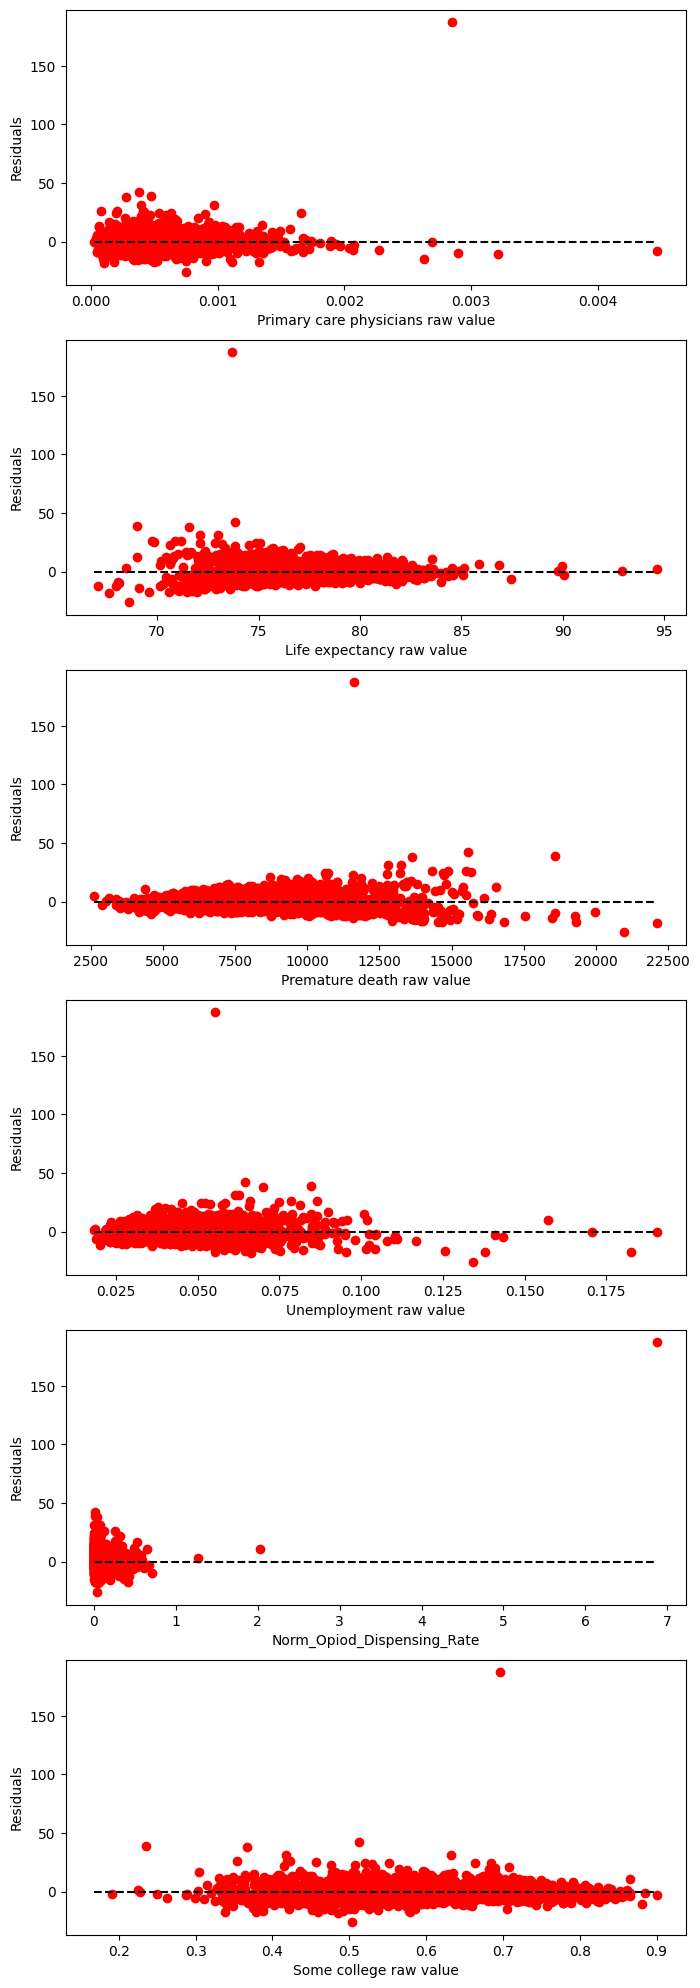

In [29]:
super_df['pred'] =  nlm.params[0]*super_df['Norm_Opiod_Dispensing_Rate']**2 + nlm.params[1]*super_df['Primary care physicians raw value']  + nlm.params[2]*super_df['Life expectancy raw value'] + nlm.params[3]*super_df['Premature death raw value']  + nlm.params[4]*super_df['Unemployment raw value'] + nlm.params[5]*super_df['Some college raw value']
super_df['residuals'] = super_df.Norm_Deaths - super_df['pred'] 
super_df['residuals'] = super_df.Norm_Deaths - super_df['pred'] 
plt.figure(figsize= (8,25))
variables_ = ['Primary care physicians raw value','Life expectancy raw value','Premature death raw value','Unemployment raw value','Norm_Opiod_Dispensing_Rate', 'Some college raw value']
for i in range(0,6):
    plt.subplot(6,1,i+1)
    plt.plot(super_df[variables_[i]],super_df.residuals,'ro')
    plt.plot((super_df[variables_[i]].min(),super_df[variables_[i]].max()),[0,0],'k--')
    plt.xlabel(variables_[i])
    plt.ylabel('Residuals')


##### conclusion: 

The non-Linear regression model had a better performance.

**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Discuss the results as a team. Put together a presentation of your findings, record it via zoom, and upload the recording to canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage V. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*